<a href="https://colab.research.google.com/github/Jamaleldin/MRNET-for-Knee-Diagnosis/blob/Model_inception/Inception_trasfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All needed library imports**

In [0]:
from tensorflow.keras.applications import InceptionV3
import tensorflow as tf
from tensorflow import keras

# **Importing the notebook**

In [2]:
# getting the notebook path
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [3]:
!pip install import-ipynb

In [4]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
unzip:  cannot find or open /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip, /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.zip or /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip.ZIP.


# **Initializing the feature extractor used**

In [0]:
# the extractor uses transfer learning using the weights of imageNet
extractor = InceptionV3(weights='imagenet',input_shape=(256,256,3),include_top=False);
extractor.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4) ,metrics=['acc']);

In [23]:
extractor.summary();

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 127, 127, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 127, 127, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

# **Creating the binary classifier model**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential();
  binary_class.add(keras.layers.Dense(units=128 , activation = 'relu' , input_dim = 2048,kernel_regularizer=keras.regularizers.l2(0.001) ));
  binary_class.add(keras.layers.Dropout(0.5));
  binary_class.add(keras.layers.Dense(units=64 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)));
  binary_class.add(keras.layers.Dropout(0.5));
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'));
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(lr=1e-4),metrics=['acc']);
  return binary_class;

In [9]:
binary_classifier().summary();

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 270,593
Trainable params: 270,593
Non-trainable params: 0
_________________________________________________________________


# **Training the classifiers**

## **Axial-abnormal**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 6.1863 - acc: 0.6833
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 27ms/step - loss: 5.6813 - acc: 0.6804 - val_loss: 1.4535 - val_acc: 0.8053
Epoch 2/50
43/51 [========================>.....] - ETA: 0s - loss: 2.7795 - acc: 0.7140
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 2.7346 - acc: 0.7011 - val_loss: 1.1138 - val_acc: 0.7876
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 1.7787 - acc: 0.7104
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 1.7489 - acc: 0.7099 - val_loss: 0.8247 - val_acc: 0.7699
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 1.0474 - acc: 0.7138
Epoch 00004: val_acc did not

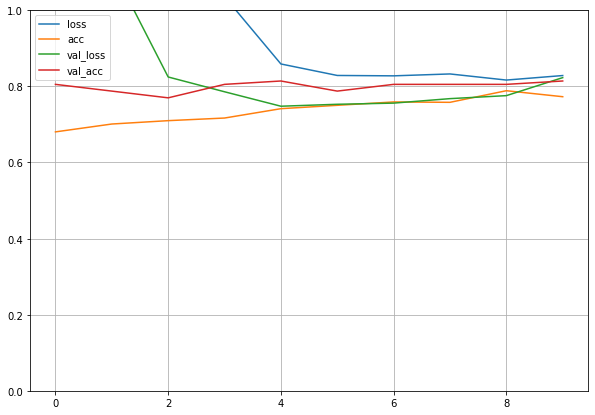

In [10]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [11]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.8731 - acc: 0.7917


## **Axial-acl**

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 12.0524 - acc: 0.6628
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 0s 8ms/step - loss: 11.4452 - acc: 0.6657 - val_loss: 2.8657 - val_acc: 0.8496
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 4.3224 - acc: 0.6393
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 4.1470 - acc: 0.6460 - val_loss: 1.2584 - val_acc: 0.8496
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 2.3257 - acc: 0.6424
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 4ms/step - loss: 2.2747 - acc: 0.6450 - val_loss: 0.8637 - val_acc: 0.8496
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 1.4469 - acc: 0.6000
Epoch 00004: val_acc did not imp

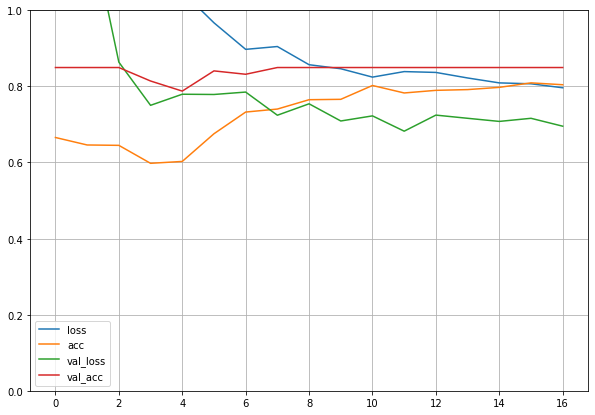

In [12]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.acl);

In [13]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 4ms/step - loss: 8.2378 - acc: 0.5500


## **Axial-meniscal**

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 10.2928 - acc: 0.5562
Epoch 00001: val_acc improved from -inf to 0.53982, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 9.2014 - acc: 0.5556 - val_loss: 1.2986 - val_acc: 0.5398
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 3.3515 - acc: 0.5326
Epoch 00002: val_acc improved from 0.53982 to 0.65487, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 0s 5ms/step - loss: 3.2499 - acc: 0.5339 - val_loss: 1.2804 - val_acc: 0.6549
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 1.8550 - acc: 0.5756
Epoch 00003: val_acc did not improve from 0.65487
51/51 [==============================] - 0s 5ms/step - loss: 1.8047 - acc: 0.5742 - val_loss: 0.9654 - val_acc: 0.6283
Epoch 

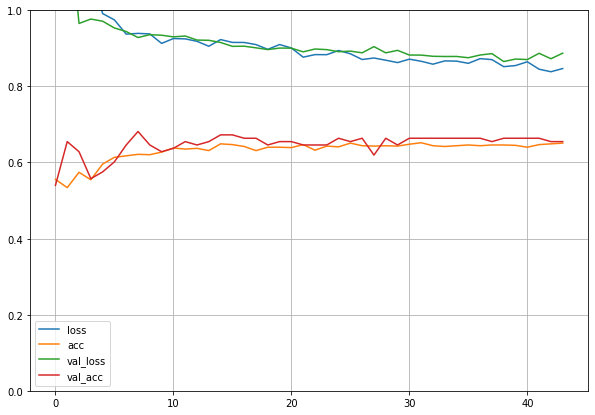

In [14]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.meniscal);

In [15]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.9620 - acc: 0.5500


## **sagittal-abnormal**

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 6.6025 - acc: 0.6750
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 8ms/step - loss: 6.3038 - acc: 0.6735 - val_loss: 2.0548 - val_acc: 0.8053
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 2.8098 - acc: 0.6856
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 2.6751 - acc: 0.6893 - val_loss: 1.1433 - val_acc: 0.7965
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 1.4691 - acc: 0.7256
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 1.4306 - acc: 0.7227 - val_loss: 0.8486 - val_acc: 0.7876
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 1.0056 - acc: 0.7219
Epoch 00004: val_acc did n

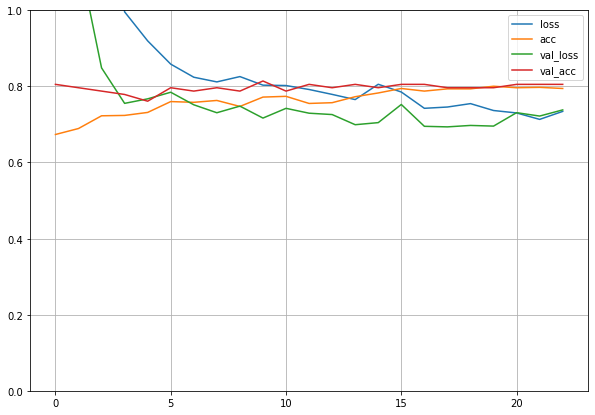

In [16]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.abnormal);

In [17]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 4ms/step - loss: 0.6966 - acc: 0.8167


## **sagittal-acl**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 7.8945 - acc: 0.6810
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 8ms/step - loss: 7.5336 - acc: 0.6844 - val_loss: 1.7790 - val_acc: 0.8496
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 2.8257 - acc: 0.7174
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 4ms/step - loss: 2.7098 - acc: 0.7148 - val_loss: 0.9404 - val_acc: 0.8496
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 1.6602 - acc: 0.6845
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.6024 - acc: 0.6971 - val_loss: 0.7889 - val_acc: 0.8407
Epoch 4/50
46/51 [==========================>...] - ETA: 0s - loss: 1.1239 - acc: 0.7120
Epoch 00004: val_acc did not im

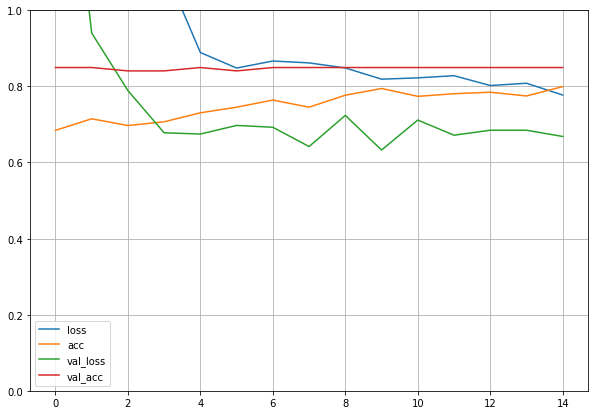

In [18]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.acl);

In [19]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 4ms/step - loss: 4.6409 - acc: 0.5500


## **sagittal-meniscal**

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 7.6249 - acc: 0.5307
Epoch 00001: val_acc improved from -inf to 0.63717, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 8ms/step - loss: 7.2800 - acc: 0.5270 - val_loss: 1.7972 - val_acc: 0.6372
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 3.3159 - acc: 0.5500
Epoch 00002: val_acc did not improve from 0.63717
51/51 [==============================] - 0s 4ms/step - loss: 3.2570 - acc: 0.5467 - val_loss: 1.0482 - val_acc: 0.6372
Epoch 3/50
38/51 [=====================>........] - ETA: 0s - loss: 1.6731 - acc: 0.5658
Epoch 00003: val_acc improved from 0.63717 to 0.68142, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 1.6037 - acc: 0.5634 - val_loss: 0.9455 - val_acc: 0.6814
E

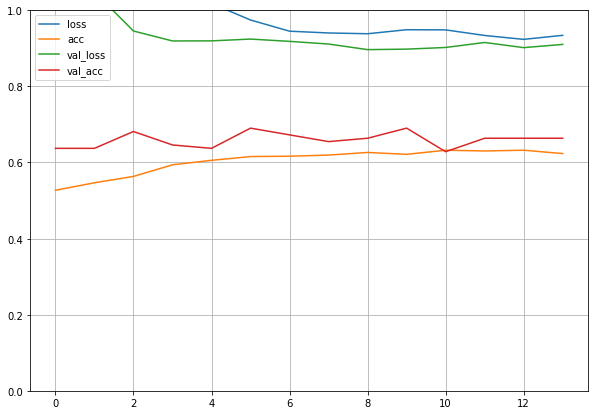

In [20]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.meniscal);

In [21]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.9328 - acc: 0.5417


## **coronal-abnormal**

Epoch 1/50
40/51 [======================>.......] - ETA: 0s - loss: 10.5361 - acc: 0.6650
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 0s 9ms/step - loss: 9.3757 - acc: 0.6735 - val_loss: 3.0929 - val_acc: 0.8053
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 3.4347 - acc: 0.7040
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 3.4251 - acc: 0.7011 - val_loss: 1.1024 - val_acc: 0.7788
Epoch 3/50
41/51 [=======================>......] - ETA: 0s - loss: 1.6863 - acc: 0.6854
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 1.5736 - acc: 0.6853 - val_loss: 0.7440 - val_acc: 0.7876
Epoch 4/50
42/51 [=======================>......] - ETA: 0s - loss: 1.0136 - acc: 0.7083
Epoch 00004: val_acc did n

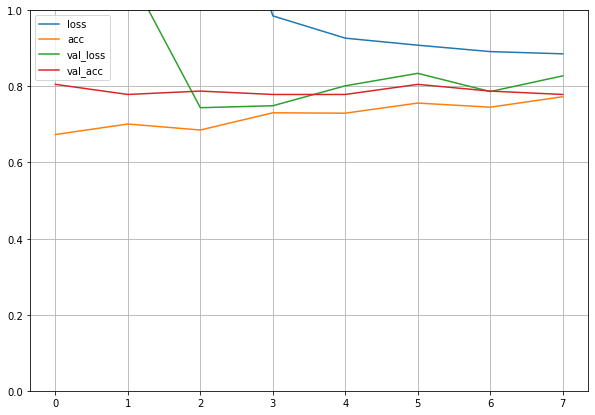

In [22]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.abnormal);

In [23]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 3.7426 - acc: 0.7917


## **coronal-acl**

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 8.6841 - acc: 0.6886 
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 0s 8ms/step - loss: 8.1344 - acc: 0.6765 - val_loss: 1.3234 - val_acc: 0.8496
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 2.9698 - acc: 0.6726
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 2.8382 - acc: 0.6667 - val_loss: 0.8298 - val_acc: 0.8319
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 1.4373 - acc: 0.6619
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 1.3892 - acc: 0.6588 - val_loss: 0.7491 - val_acc: 0.8496
Epoch 4/50
42/51 [=======================>......] - ETA: 0s - loss: 1.0257 - acc: 0.6464
Epoch 00004: val_acc did not im

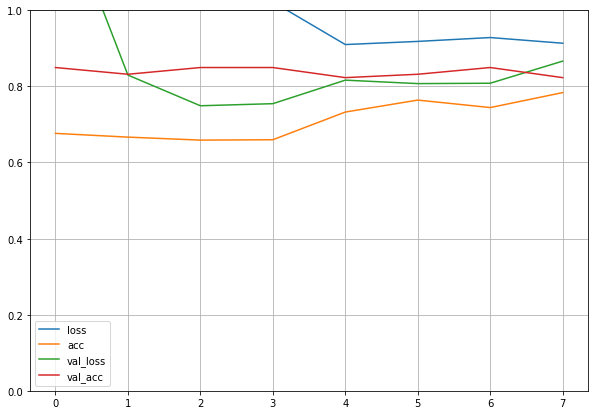

In [24]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.acl);

In [25]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 3.1743 - acc: 0.5500


## **coronal-meniscal**

Epoch 1/50
44/51 [========================>.....] - ETA: 0s - loss: 9.8317 - acc: 0.5273 
Epoch 00001: val_acc improved from -inf to 0.61947, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 7ms/step - loss: 9.0969 - acc: 0.5270 - val_loss: 1.3403 - val_acc: 0.6195
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 2.6123 - acc: 0.5648
Epoch 00002: val_acc did not improve from 0.61947
51/51 [==============================] - 0s 4ms/step - loss: 2.4776 - acc: 0.5664 - val_loss: 1.0222 - val_acc: 0.5575
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 1.2687 - acc: 0.6163
Epoch 00003: val_acc improved from 0.61947 to 0.64602, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 1.2416 - acc: 0.6155 - val_loss: 0.9594 - val_acc: 0.6460
Ep

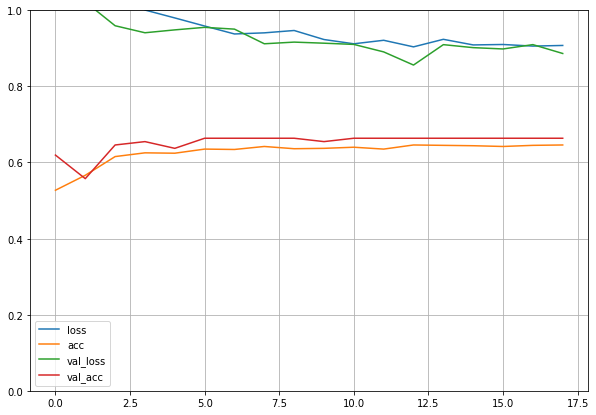

In [26]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.meniscal);

In [27]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.9256 - acc: 0.5750


# **Using another classifier format**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 2048 ))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' ))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [29]:
binary_classifier().summary();

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_34 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 513       
Total params: 2,623,489
Trainable params: 2,623,489
Non-trainable params: 0
_________________________________________________________________


## **Axial-abnormal**

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 3.0939 - acc: 0.7474
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 2s 31ms/step - loss: 2.8250 - acc: 0.7345 - val_loss: 0.7783 - val_acc: 0.8053
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6502 - acc: 0.7898
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.6608 - acc: 0.7915 - val_loss: 0.5731 - val_acc: 0.7257
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.9730 - acc: 0.7729
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 0.9475 - acc: 0.7778 - val_loss: 0.6448 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.7225 - acc: 0.7990
Epoch 00004: val_acc did not

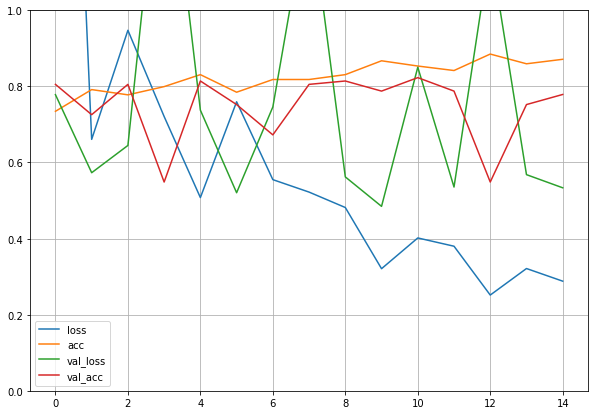

In [30]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [31]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 1.1714 - acc: 0.8000


## **Axial-acl**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 3.4458 - acc: 0.7133
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 3s 51ms/step - loss: 3.3978 - acc: 0.7178 - val_loss: 1.3339 - val_acc: 0.8496
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 0.9001 - acc: 0.7667
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.8916 - acc: 0.7660 - val_loss: 0.8831 - val_acc: 0.6460
Epoch 3/50
39/51 [=====================>........] - ETA: 0s - loss: 0.9900 - acc: 0.7654
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.9481 - acc: 0.7670 - val_loss: 0.8542 - val_acc: 0.8230
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.6354 - acc: 0.7945
Epoch 00004: val_acc did not impr

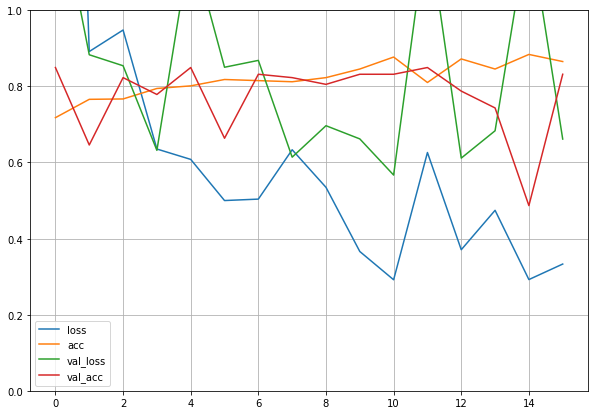

In [32]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.acl);

In [33]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 3.5282 - acc: 0.5500


## **Axial-meniscal**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 4.0588 - acc: 0.5765
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 2s 31ms/step - loss: 3.9431 - acc: 0.5831 - val_loss: 2.6515 - val_acc: 0.6637
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 1.2285 - acc: 0.6306
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 6ms/step - loss: 1.2220 - acc: 0.6293 - val_loss: 1.1130 - val_acc: 0.5398
Epoch 3/50
45/51 [=========================>....] - ETA: 0s - loss: 1.0940 - acc: 0.6278
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 6ms/step - loss: 1.0876 - acc: 0.6303 - val_loss: 1.3378 - val_acc: 0.5664
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.7762 - acc: 0.6910
Epoch 00004: val_acc did not

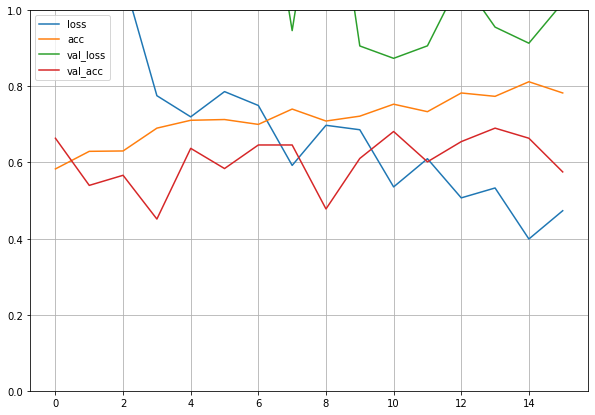

In [34]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.meniscal);

In [35]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.7490 - acc: 0.6833


## **sagittal-abnormal**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 2.5734 - acc: 0.7388
Epoch 00001: val_acc improved from -inf to 0.76991, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 2s 30ms/step - loss: 2.5097 - acc: 0.7365 - val_loss: 0.5387 - val_acc: 0.7699
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 0.6421 - acc: 0.7990
Epoch 00002: val_acc did not improve from 0.76991
51/51 [==============================] - 0s 5ms/step - loss: 0.6241 - acc: 0.8053 - val_loss: 0.6379 - val_acc: 0.7699
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 0.9055 - acc: 0.7859
Epoch 00003: val_acc did not improve from 0.76991
51/51 [==============================] - 0s 6ms/step - loss: 0.8562 - acc: 0.7876 - val_loss: 0.5860 - val_acc: 0.7611
Epoch 4/50
47/51 [==========================>...] - ETA: 0s - loss: 0.4546 - acc: 0.8309
Epoch 00004: val_acc did 

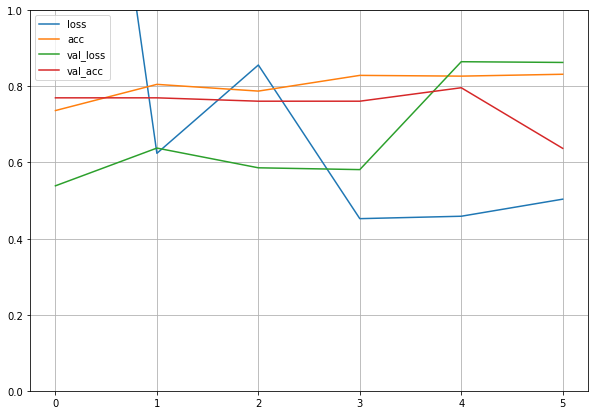

In [36]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.abnormal);

In [37]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 4ms/step - loss: 0.8933 - acc: 0.8167


## **sagittal-acl**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 3.4004 - acc: 0.7228
Epoch 00001: val_acc improved from -inf to 0.83186, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 2s 42ms/step - loss: 3.2300 - acc: 0.7178 - val_loss: 1.1213 - val_acc: 0.8319
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 0.9300 - acc: 0.7770
Epoch 00002: val_acc improved from 0.83186 to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 0s 8ms/step - loss: 0.9222 - acc: 0.7797 - val_loss: 0.7614 - val_acc: 0.8496
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.5765 - acc: 0.8050
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 0.5776 - acc: 0.8053 - val_loss: 0.8204 - val_acc: 0.6372
Epoch 4/50

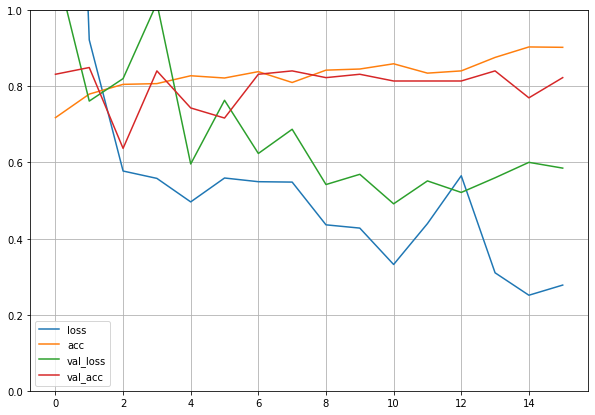

In [38]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.acl);

In [39]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 1.7238 - acc: 0.6083


## **sagittal-meniscal**

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 3.4958 - acc: 0.5844
Epoch 00001: val_acc improved from -inf to 0.46018, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 2s 44ms/step - loss: 3.4162 - acc: 0.5860 - val_loss: 1.9812 - val_acc: 0.4602
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 1.3625 - acc: 0.6280
Epoch 00002: val_acc improved from 0.46018 to 0.68142, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 1s 19ms/step - loss: 1.3722 - acc: 0.6273 - val_loss: 1.1185 - val_acc: 0.6814
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 0.8465 - acc: 0.6980
Epoch 00003: val_acc did not improve from 0.68142
51/51 [==============================] - 0s 5ms/step - loss: 0.8526 - acc: 0.6962 - val_loss: 0.7758 - val_acc: 0.6637

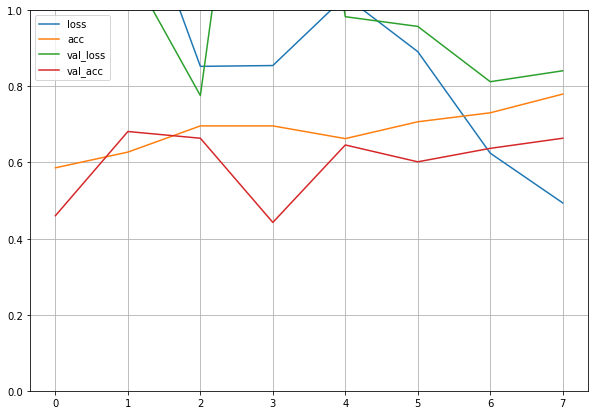

In [40]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.meniscal);

In [41]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 4ms/step - loss: 1.2335 - acc: 0.5917


## **coronal-abnormal**

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 3.1191 - acc: 0.7365
Epoch 00001: val_acc improved from -inf to 0.73451, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 1s 29ms/step - loss: 3.1191 - acc: 0.7365 - val_loss: 1.0930 - val_acc: 0.7345
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 1.1614 - acc: 0.7510
Epoch 00002: val_acc improved from 0.73451 to 0.78761, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 1s 19ms/step - loss: 1.1501 - acc: 0.7483 - val_loss: 0.8795 - val_acc: 0.7876
Epoch 3/50
43/51 [========================>.....] - ETA: 0s - loss: 1.1540 - acc: 0.7674
Epoch 00003: val_acc improved from 0.78761 to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [

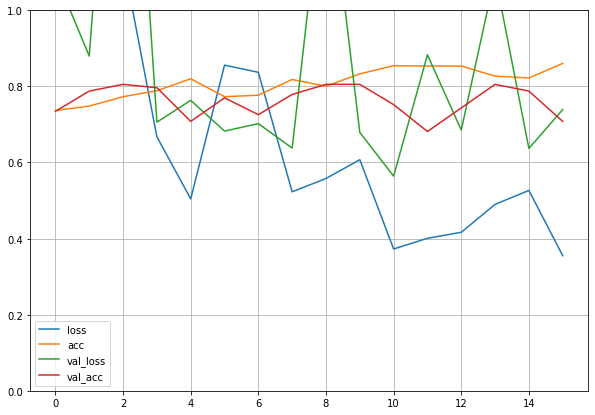

In [42]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.abnormal);

In [43]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 2.5235 - acc: 0.7917


## **coronal-acl**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 2.2238 - acc: 0.7041
Epoch 00001: val_acc improved from -inf to 0.77876, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 2s 33ms/step - loss: 2.1748 - acc: 0.7070 - val_loss: 0.7387 - val_acc: 0.7788
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 1.2028 - acc: 0.7440
Epoch 00002: val_acc did not improve from 0.77876
51/51 [==============================] - 0s 5ms/step - loss: 1.2714 - acc: 0.7325 - val_loss: 1.1604 - val_acc: 0.5841
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 0.9607 - acc: 0.7469
Epoch 00003: val_acc improved from 0.77876 to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 1s 13ms/step - loss: 0.9444 - acc: 0.7552 - val_loss: 1.3273 - val_acc: 0.8496
Epoch 4/50


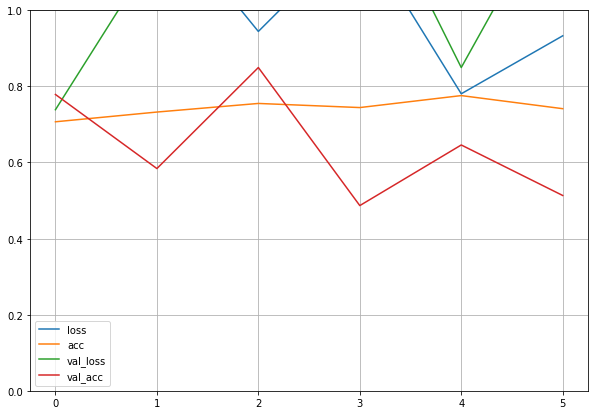

In [44]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.acl);

In [45]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 3.1945 - acc: 0.5667


## **coronal-meniscal**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 4.0877 - acc: 0.5806
Epoch 00001: val_acc improved from -inf to 0.66372, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 2s 31ms/step - loss: 3.9988 - acc: 0.5792 - val_loss: 1.7773 - val_acc: 0.6637
Epoch 2/50
50/51 [============================>.] - ETA: 0s - loss: 1.4131 - acc: 0.6120
Epoch 00002: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 5ms/step - loss: 1.4146 - acc: 0.6087 - val_loss: 1.5341 - val_acc: 0.6460
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 1.1547 - acc: 0.6323
Epoch 00003: val_acc did not improve from 0.66372
51/51 [==============================] - 0s 5ms/step - loss: 1.1547 - acc: 0.6323 - val_loss: 0.9736 - val_acc: 0.6018
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 0.9865 - acc: 0.6590
Epoch 00004: val_acc did n

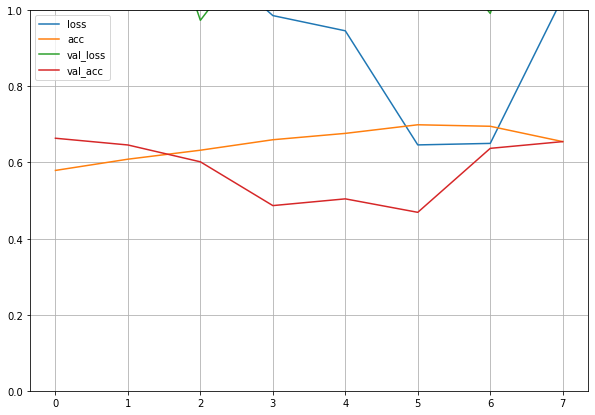

In [46]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.meniscal);

In [47]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 2.0418 - acc: 0.5500


# **Adding dropout layers to decrease overfit**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 2048 ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu' ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [7]:
binary_classifier().summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 2,623,489
Trainable params: 2,623,489
Non-trainable params: 0
_________________________________________________________________


## **Axial-abnormal**

Epoch 1/50
42/51 [=======================>......] - ETA: 0s - loss: 8.5041 - acc: 0.6893
Epoch 00001: val_acc improved from -inf to 0.83186, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 3s 67ms/step - loss: 8.3173 - acc: 0.7001 - val_loss: 1.8509 - val_acc: 0.8319
Epoch 2/50
49/51 [===========================>..] - ETA: 0s - loss: 5.4874 - acc: 0.7265
Epoch 00002: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 5ms/step - loss: 5.4786 - acc: 0.7266 - val_loss: 1.1151 - val_acc: 0.8142
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 3.9541 - acc: 0.7188
Epoch 00003: val_acc did not improve from 0.83186
51/51 [==============================] - 0s 6ms/step - loss: 4.0151 - acc: 0.7198 - val_loss: 1.4485 - val_acc: 0.8053
Epoch 4/50
50/51 [============================>.] - ETA: 0s - loss: 2.9140 - acc: 0.7340
Epoch 00004: val_acc did not

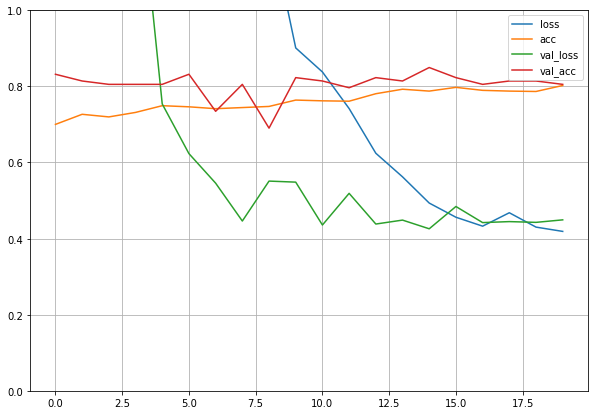

In [8]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [9]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.5216 - acc: 0.8000


## **Axial-acl**

Epoch 1/50
48/51 [===========================>..] - ETA: 0s - loss: 8.3254 - acc: 0.7083
Epoch 00001: val_acc improved from -inf to 0.84071, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 4s 73ms/step - loss: 8.2262 - acc: 0.7030 - val_loss: 1.3263 - val_acc: 0.8407
Epoch 2/50
44/51 [========================>.....] - ETA: 0s - loss: 5.9760 - acc: 0.6852
Epoch 00002: val_acc improved from 0.84071 to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_acl.h5
51/51 [==============================] - 1s 19ms/step - loss: 5.7486 - acc: 0.6903 - val_loss: 1.3452 - val_acc: 0.8496
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 3.9381 - acc: 0.7208
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 6ms/step - loss: 3.9023 - acc: 0.7188 - val_loss: 0.9284 - val_acc: 0.8496
Epoch 4/50
43/5

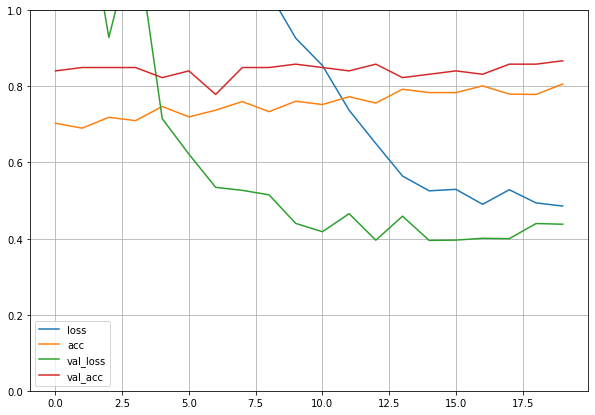

In [10]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.acl);

In [11]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.acl,processing.classifier),processing.axial,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.6802 - acc: 0.6250


## **Axial-meniscal**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 10.7285 - acc: 0.5815
Epoch 00001: val_acc improved from -inf to 0.40708, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 3s 62ms/step - loss: 10.5151 - acc: 0.5782 - val_loss: 4.0539 - val_acc: 0.4071
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 6.4006 - acc: 0.5598
Epoch 00002: val_acc improved from 0.40708 to 0.65487, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [==============================] - 1s 19ms/step - loss: 6.3056 - acc: 0.5634 - val_loss: 3.1337 - val_acc: 0.6549
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 4.2823 - acc: 0.5633
Epoch 00003: val_acc improved from 0.65487 to 0.66372, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_meniscus.h5
51/51 [====

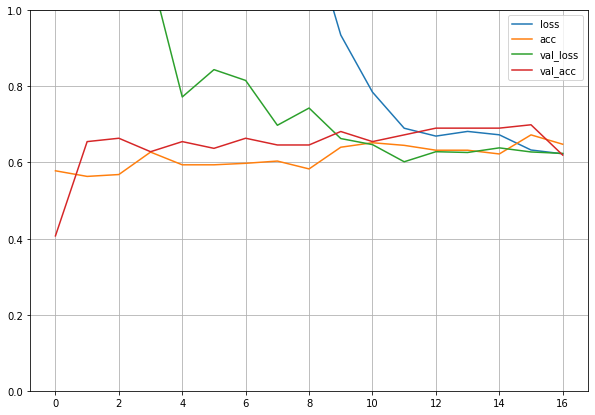

In [12]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.meniscal);

In [13]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.meniscal,processing.classifier),processing.axial,processing.meniscal);

4/4 [==============================] - 0s 4ms/step - loss: 0.6734 - acc: 0.6083


## **sagittal-abnormal**

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 7.7524 - acc: 0.7067
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 3s 57ms/step - loss: 7.3925 - acc: 0.7099 - val_loss: 4.1809 - val_acc: 0.8053
Epoch 2/50
47/51 [==========================>...] - ETA: 0s - loss: 4.8291 - acc: 0.7202
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 6ms/step - loss: 4.7404 - acc: 0.7188 - val_loss: 2.5906 - val_acc: 0.7876
Epoch 3/50
47/51 [==========================>...] - ETA: 0s - loss: 3.2066 - acc: 0.7564
Epoch 00003: val_acc improved from 0.80531 to 0.82301, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 1s 12ms/step - loss: 3.1807 - acc: 0.7483 - val_loss: 1.1036 - val_acc: 0.8230

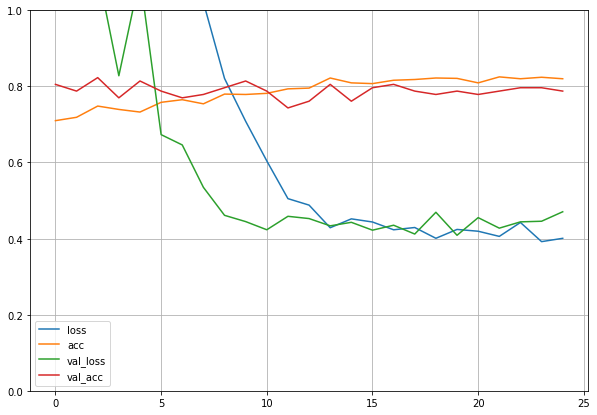

In [14]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.abnormal);

In [15]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.abnormal,processing.classifier),processing.sagittal,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 1.3799 - acc: 0.8333


## **sagittal-acl**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 8.6083 - acc: 0.7152
Epoch 00001: val_acc improved from -inf to 0.81416, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 3s 57ms/step - loss: 8.4313 - acc: 0.7129 - val_loss: 1.2214 - val_acc: 0.8142
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 5.3483 - acc: 0.7167
Epoch 00002: val_acc improved from 0.81416 to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_acl.h5
51/51 [==============================] - 1s 19ms/step - loss: 5.0882 - acc: 0.7168 - val_loss: 1.8811 - val_acc: 0.8496
Epoch 3/50
50/51 [============================>.] - ETA: 0s - loss: 3.6699 - acc: 0.7190
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 5ms/step - loss: 3.7366 - acc: 0.7139 - val_loss: 1.2251 - val_acc: 0.8496
Epoch 4/5

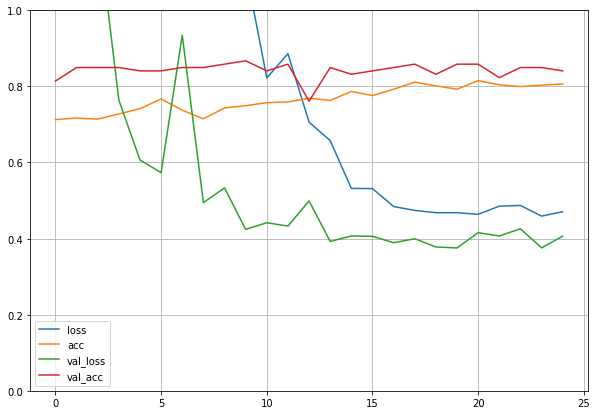

In [16]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.acl);

In [17]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.acl,processing.classifier),processing.sagittal,processing.acl);

4/4 [==============================] - 0s 3ms/step - loss: 0.7791 - acc: 0.6417


## **sagittal-meniscal**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 10.0012 - acc: 0.5609
Epoch 00001: val_acc improved from -inf to 0.67257, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/sagittal_meniscus.h5
51/51 [==============================] - 3s 64ms/step - loss: 9.8331 - acc: 0.5634 - val_loss: 2.6865 - val_acc: 0.6726
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 6.5238 - acc: 0.5708
Epoch 00002: val_acc did not improve from 0.67257
51/51 [==============================] - 0s 5ms/step - loss: 6.4895 - acc: 0.5723 - val_loss: 2.9473 - val_acc: 0.6637
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 4.8129 - acc: 0.5813
Epoch 00003: val_acc did not improve from 0.67257
51/51 [==============================] - 0s 6ms/step - loss: 4.7082 - acc: 0.5860 - val_loss: 3.0039 - val_acc: 0.6637
Epoch 4/50
41/51 [=======================>......] - ETA: 0s - loss: 3.6222 - acc: 0.5829
Epoch 00004: val_acc did

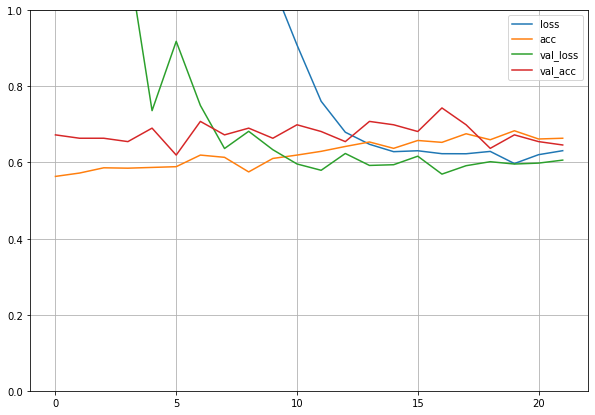

In [18]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.sagittal,processing.meniscal);

In [19]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.sagittal,processing.meniscal,processing.classifier),processing.sagittal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.6300 - acc: 0.5917


## **coronal-abnormal**

Epoch 1/50
47/51 [==========================>...] - ETA: 0s - loss: 10.6555 - acc: 0.6926
Epoch 00001: val_acc improved from -inf to 0.79646, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 3s 67ms/step - loss: 10.6481 - acc: 0.6912 - val_loss: 1.4943 - val_acc: 0.7965
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 6.5174 - acc: 0.6978
Epoch 00002: val_acc improved from 0.79646 to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51 [==============================] - 1s 18ms/step - loss: 6.6125 - acc: 0.7050 - val_loss: 3.0107 - val_acc: 0.8053
Epoch 3/50
46/51 [==========================>...] - ETA: 0s - loss: 5.0391 - acc: 0.6804
Epoch 00003: val_acc improved from 0.80531 to 0.83186, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_abnormal.h5
51/51

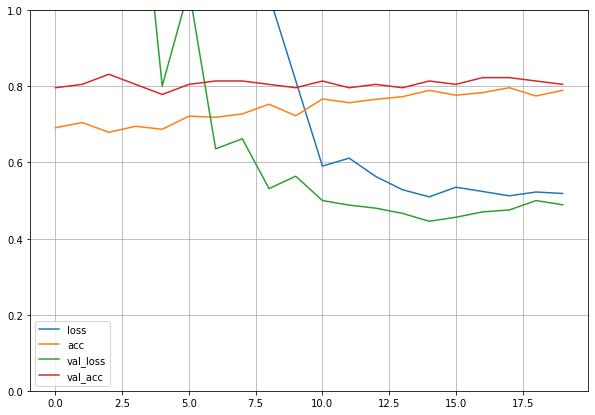

In [20]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.abnormal);

In [21]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.abnormal,processing.classifier),processing.coronal,processing.abnormal);

4/4 [==============================] - 0s 5ms/step - loss: 1.5918 - acc: 0.7833


## **coronal-acl**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 9.5222 - acc: 0.7141
Epoch 00001: val_acc improved from -inf to 0.84956, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_acl.h5
51/51 [==============================] - 4s 74ms/step - loss: 9.3513 - acc: 0.7070 - val_loss: 3.8214 - val_acc: 0.8496
Epoch 2/50
48/51 [===========================>..] - ETA: 0s - loss: 6.6365 - acc: 0.7073
Epoch 00002: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 6ms/step - loss: 6.4888 - acc: 0.7070 - val_loss: 3.0673 - val_acc: 0.8496
Epoch 3/50
48/51 [===========================>..] - ETA: 0s - loss: 4.9667 - acc: 0.7010
Epoch 00003: val_acc did not improve from 0.84956
51/51 [==============================] - 0s 6ms/step - loss: 4.9430 - acc: 0.7030 - val_loss: 0.9150 - val_acc: 0.7699
Epoch 4/50
48/51 [===========================>..] - ETA: 0s - loss: 3.5061 - acc: 0.7042
Epoch 00004: val_acc did not im

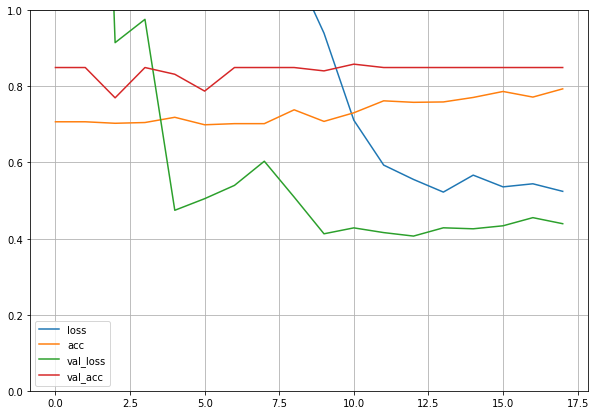

In [22]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.acl);

In [23]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.acl,processing.classifier),processing.coronal,processing.acl);

4/4 [==============================] - 0s 4ms/step - loss: 0.8821 - acc: 0.5583


## **coronal-meniscal**

Epoch 1/50
45/51 [=========================>....] - ETA: 0s - loss: 12.3904 - acc: 0.5878
Epoch 00001: val_acc improved from -inf to 0.65487, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 3s 67ms/step - loss: 12.1093 - acc: 0.5851 - val_loss: 2.3065 - val_acc: 0.6549
Epoch 2/50
46/51 [==========================>...] - ETA: 0s - loss: 8.9088 - acc: 0.5652
Epoch 00002: val_acc improved from 0.65487 to 0.66372, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51 [==============================] - 1s 19ms/step - loss: 8.8395 - acc: 0.5634 - val_loss: 1.9373 - val_acc: 0.6637
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 6.2032 - acc: 0.5409
Epoch 00003: val_acc improved from 0.66372 to 0.67257, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/coronal_meniscus.h5
51/51

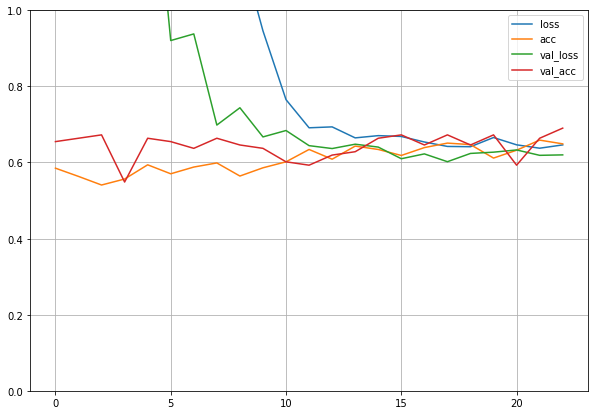

In [0]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.coronal,processing.meniscal);

In [0]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.coronal,processing.meniscal,processing.classifier),processing.coronal,processing.meniscal);

4/4 [==============================] - 0s 3ms/step - loss: 0.7016 - acc: 0.5833


# **Adding L2 regularization**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 2048 ,kernel_regularizer=keras.regularizers.l2(0.001)))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001) ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [27]:
binary_classifier().summary();

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 513       
Total params: 2,623,489
Trainable params: 2,623,489
Non-trainable params: 0
_________________________________________________________________


## **Axial-abnormal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 10.3558 - acc: 0.7023
Epoch 00001: val_acc improved from -inf to 0.82301, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 3s 64ms/step - loss: 9.8104 - acc: 0.7129 - val_loss: 3.6251 - val_acc: 0.8230
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 7.2517 - acc: 0.7233
Epoch 00002: val_acc did not improve from 0.82301
51/51 [==============================] - 0s 6ms/step - loss: 7.2606 - acc: 0.7217 - val_loss: 2.9850 - val_acc: 0.8053
Epoch 3/50
42/51 [=======================>......] - ETA: 0s - loss: 5.3656 - acc: 0.7298
Epoch 00003: val_acc did not improve from 0.82301
51/51 [==============================] - 0s 6ms/step - loss: 5.5623 - acc: 0.7266 - val_loss: 2.8842 - val_acc: 0.6991
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 4.2843 - acc: 0.7455
Epoch 00004: val_acc did no

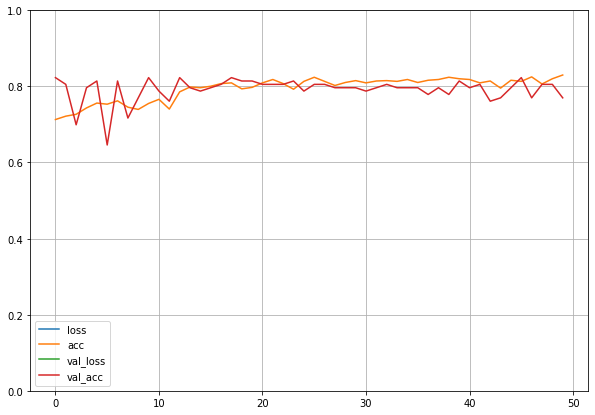

In [28]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [29]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 4ms/step - loss: 4.4509 - acc: 0.7833


# **Trying a more complex classifier**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=1024 , activation = 'relu' , input_dim = 2048 ,kernel_regularizer=keras.regularizers.l2(0.001)))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=512 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001) ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=256 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001) ))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [31]:
binary_classifier().summary();

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 257       
Total params: 2,754,561
Trainable params: 2,754,561
Non-trainable params: 0
___________________________________________

## **Axial-abnormal**

Epoch 1/50
49/51 [===========================>..] - ETA: 0s - loss: 7.7945 - acc: 0.6898
Epoch 00001: val_acc improved from -inf to 0.63717, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 1s 13ms/step - loss: 7.7412 - acc: 0.6873 - val_loss: 3.3828 - val_acc: 0.6372
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 5.2551 - acc: 0.7257
Epoch 00002: val_acc did not improve from 0.63717
51/51 [==============================] - 0s 7ms/step - loss: 5.2551 - acc: 0.7257 - val_loss: 4.2364 - val_acc: 0.3982
Epoch 3/50
47/51 [==========================>...] - ETA: 0s - loss: 4.8636 - acc: 0.7149
Epoch 00003: val_acc did not improve from 0.63717
51/51 [==============================] - 0s 7ms/step - loss: 4.8894 - acc: 0.7099 - val_loss: 3.8891 - val_acc: 0.4159
Epoch 4/50
44/51 [========================>.....] - ETA: 0s - loss: 4.3329 - acc: 0.7148
Epoch 00004: val_acc improve

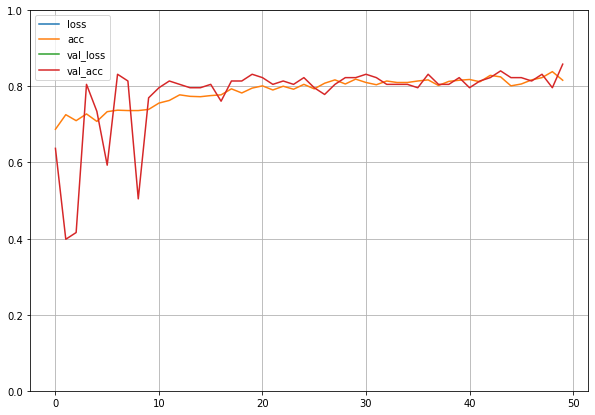

In [32]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [33]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 1.9032 - acc: 0.8083


# **Trying a more simple classifier**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=64, activation = 'relu' , input_dim = 2048 ,kernel_regularizer=keras.regularizers.l2(0.001)))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=32 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001) ))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=16 , activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001) ))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [35]:
binary_classifier().summary();

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                131136    
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 17        
Total params: 133,761
Trainable params: 133,761
Non-trainable params: 0
_______________________________________________

## **Axial-abnormal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 3.1575 - acc: 0.6872
Epoch 00001: val_acc improved from -inf to 0.75221, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 3s 67ms/step - loss: 2.9424 - acc: 0.6834 - val_loss: 0.9011 - val_acc: 0.7522
Epoch 2/50
40/51 [======================>.......] - ETA: 0s - loss: 1.4294 - acc: 0.6650
Epoch 00002: val_acc improved from 0.75221 to 0.76106, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 0s 6ms/step - loss: 1.3246 - acc: 0.6716 - val_loss: 0.7856 - val_acc: 0.7611
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.9064 - acc: 0.6942
Epoch 00003: val_acc did not improve from 0.76106
51/51 [==============================] - 0s 5ms/step - loss: 0.9064 - acc: 0.6942 - val_loss: 0.7004 - val_acc: 0.7611
Epoch 

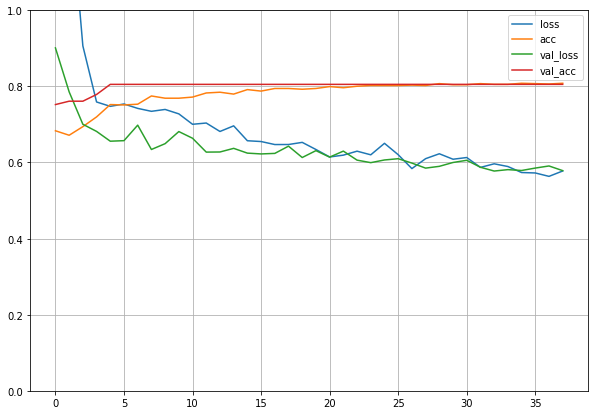

In [36]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [37]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.7125 - acc: 0.7917


# **Trying a more simple classifier 2**

In [0]:
def binary_classifier():  
  binary_class = keras.models.Sequential()
  binary_class.add(keras.layers.Dense(units=512, activation = 'relu' , input_dim = 2048))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=256 , activation = 'relu'))
  binary_class.add(keras.layers.Dropout(0.5))
  binary_class.add(keras.layers.Dense(units=128 , activation = 'relu'))
  binary_class.add(keras.layers.Dense(units=1 , activation = 'sigmoid'))
  binary_class.compile(loss='binary_crossentropy',optimizer = keras.optimizers.Adam(1e-4),metrics=['acc'])
  return binary_class

In [43]:
binary_classifier().summary();

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 129       
Total params: 1,213,441
Trainable params: 1,213,441
Non-trainable params: 0
___________________________________________

## **Axial-abnormal**

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 5.1415 - acc: 0.6936
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/InceptionV3_transfer_learning/Classifier/axial_abnormal.h5
51/51 [==============================] - 3s 63ms/step - loss: 5.1092 - acc: 0.6735 - val_loss: 1.3546 - val_acc: 0.8053
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 2.9618 - acc: 0.7143
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 2.7623 - acc: 0.7168 - val_loss: 1.3456 - val_acc: 0.8053
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 2.0953 - acc: 0.6980
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 5ms/step - loss: 2.0556 - acc: 0.7021 - val_loss: 0.6841 - val_acc: 0.8053
Epoch 4/50
40/51 [======================>.......] - ETA: 0s - loss: 1.6873 - acc: 0.7212
Epoch 00004: val_acc did not

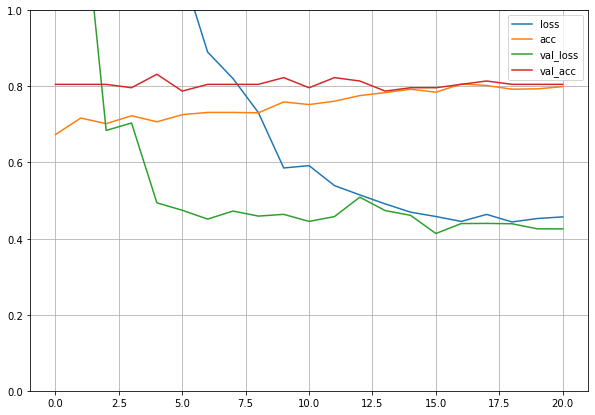

In [7]:
processing.train_classifier(extractor,binary_classifier(),processing.inception_transfer,processing.axial,processing.abnormal);

In [8]:
processing.test_classifier(extractor,processing.load_model(processing.inception_transfer,processing.axial,processing.abnormal,processing.classifier),processing.axial,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.7307 - acc: 0.8000


# **Creating the logistic regressor model**

In [0]:
def logistic_regressor():
  log_reg = keras.models.Sequential()
  log_reg.add(keras.layers.Dense(1 , activation = 'sigmoid' , input_dim = 3))
  log_reg.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['acc'])
  return log_reg

In [0]:
logistic_regressor().summary();

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# **Training the logistic regressors**

## **Abnormal**

Epoch 1/50
43/51 [========================>.....] - ETA: 0s - loss: 0.8038 - acc: 0.1907
Epoch 00001: val_acc improved from -inf to 0.17699, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.8007 - acc: 0.1927 - val_loss: 0.7638 - val_acc: 0.1770
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.7353 - acc: 0.2578
Epoch 00002: val_acc improved from 0.17699 to 0.59292, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 4ms/step - loss: 0.7288 - acc: 0.2989 - val_loss: 0.6983 - val_acc: 0.5929
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6684 - acc: 0.7112
Epoch 00003: val_acc improved from 0.59292 to 0.76106, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/abnormal.h5
51/51 [==============================] - 0s 3ms/step -

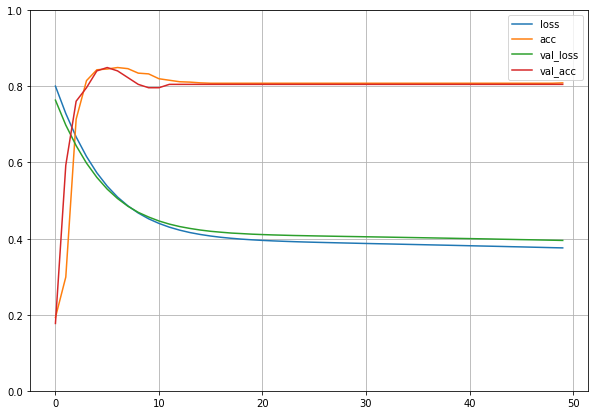

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.inception_transfer,processing.abnormal);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.inception_transfer,processing.abnormal);

4/4 [==============================] - 0s 3ms/step - loss: 0.5338 - acc: 0.8083


## **ACL**

Epoch 1/50
46/51 [==========================>...] - ETA: 0s - loss: 0.7250 - acc: 0.1957
Epoch 00001: val_acc improved from -inf to 0.20354, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.7241 - acc: 0.1976 - val_loss: 0.7387 - val_acc: 0.2035
Epoch 2/50
42/51 [=======================>......] - ETA: 0s - loss: 0.7054 - acc: 0.3405
Epoch 00002: val_acc improved from 0.20354 to 0.46018, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.7044 - acc: 0.3628 - val_loss: 0.7166 - val_acc: 0.4602
Epoch 3/50
49/51 [===========================>..] - ETA: 0s - loss: 0.6861 - acc: 0.5857
Epoch 00003: val_acc improved from 0.46018 to 0.61062, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/acl.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6861 -

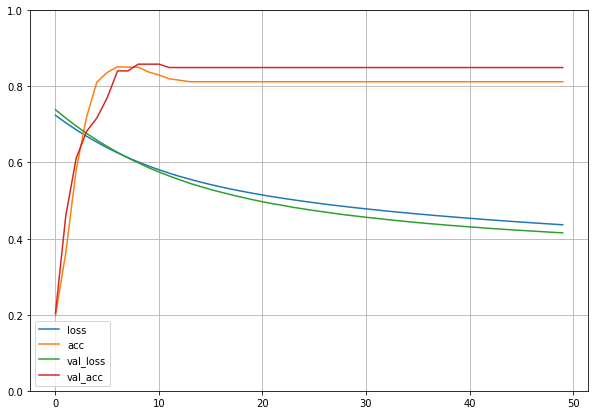

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.inception_transfer,processing.acl);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.inception_transfer,processing.acl);

4/4 [==============================] - 0s 2ms/step - loss: 0.6529 - acc: 0.6250


## **Meniscal**

Epoch 1/50
39/51 [=====================>........] - ETA: 0s - loss: 0.7064 - acc: 0.4846
Epoch 00001: val_acc improved from -inf to 0.55752, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 6ms/step - loss: 0.7043 - acc: 0.5084 - val_loss: 0.6866 - val_acc: 0.5575
Epoch 2/50
45/51 [=========================>....] - ETA: 0s - loss: 0.7005 - acc: 0.5522
Epoch 00002: val_acc improved from 0.55752 to 0.59292, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step - loss: 0.6999 - acc: 0.5556 - val_loss: 0.6820 - val_acc: 0.5929
Epoch 3/50
44/51 [========================>.....] - ETA: 0s - loss: 0.6984 - acc: 0.5784
Epoch 00003: val_acc improved from 0.59292 to 0.61947, saving model to /content/drive/My Drive/Models/VGG16_transfer_learning/Regressor/meniscus.h5
51/51 [==============================] - 0s 3ms/step -

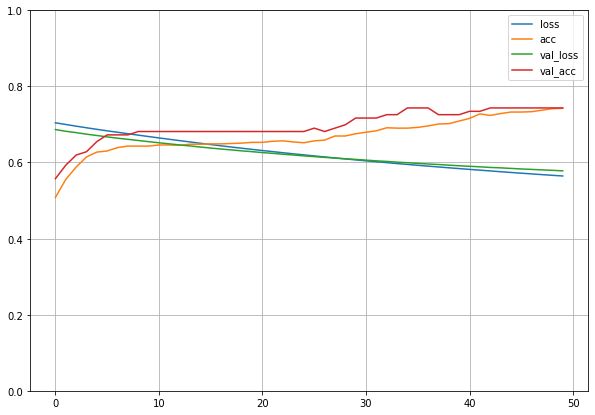

In [0]:
processing.train_regressor(logistic_regressor(),extractor,extractor,extractor,processing.inception_transfer,processing.meniscal);

In [0]:
processing.test_regressor(extractor,extractor,extractor,processing.inception_transfer,processing.meniscal);

4/4 [==============================] - 0s 2ms/step - loss: 0.6374 - acc: 0.5917
